taught by 范志红，南京大学

In [91]:
import math
import random
from scipy.special import comb, perm

In [42]:
# birthday problem
def same_bday(n):
    total_prob=0
    for i in range(2,n+1):       
        prob_i=365*math.factorial(i)*perm(364,40-i)/math.pow(365,40)
        total_prob+=prob_i
        print("only {} people in same day*** {:.20%}".format(i,prob_i))
    print("at least 2 people in same day--- {:.20%}".format(total_prob))

In [43]:
same_bday(40)

only 2 people *** 0.06672895103193313138%
only 3 people *** 0.00061219221130213888%
only 4 people *** 0.00000746575867441633%
only 5 people *** 0.00000011346137803064%
only 6 people *** 0.00000000206293414601%
only 7 people *** 0.00000000004362700611%
only 8 people *** 0.00000000000105125316%
only 9 people *** 0.00000000000002841225%
only 10 people *** 0.00000000000000085067%
only 11 people *** 0.00000000000000002793%
only 12 people *** 0.00000000000000000100%
only 13 people *** 0.00000000000000000004%
only 14 people *** 0.00000000000000000000%
only 15 people *** 0.00000000000000000000%
only 16 people *** 0.00000000000000000000%
only 17 people *** 0.00000000000000000000%
only 18 people *** 0.00000000000000000000%
only 19 people *** 0.00000000000000000000%
only 20 people *** 0.00000000000000000000%
only 21 people *** 0.00000000000000000000%
only 22 people *** 0.00000000000000000000%
only 23 people *** 0.00000000000000000000%
only 24 people *** 0.00000000000000000000%
only 25 people *** 

In [7]:
# 甲乙扔硬币，求甲的正面次数比乙多的概率
prob=0
prob2=0
for i in range(11):
    posit_jia=0
    for j in range(i+1):
        posit_jia+=comb(11,j)*math.pow(0.5,11)
    prob+=comb(10,i)*math.pow(0.5,10)*(1-posit_jia)
    prob2+=comb(10,i)*comb(11,i)*math.pow(0.5,21)
print("甲>乙 probability ", prob)
print("甲=乙 probability ", prob2)

甲>乙 probability  0.5
甲=乙 probability  0.16818809509277344


In [20]:
def MontyHall(d_select,d_change):
    d_car=random.randint(1,3)
    if d_select==d_car and d_change==0:
        return 1
    elif d_select==d_car and d_change==1:
        return 0
    elif d_select!=d_car and d_change==0:
        return 0
    elif d_select!=d_car and d_change==1:
        return 1

In [24]:
def n_simu(n):
    win_nonchange=0
    win_change=0
    for i in range(n):
        d_select=random.randint(1,3)
        win_nonchange+=MontyHall(d_select,0)
        win_change+=MontyHall(d_select,1)
    print("改变选择，赢得概率是{:.2%}".format(win_change/n))
    print("不改变选择，赢得概率是{:.2%}".format(win_nonchange/n))

In [25]:
n_simu(100000)

不改变选择，赢得概率是33.48%
改变选择，赢得概率是66.68%


In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, perm

In [17]:
# 二项分布
def generate_yb(x,n,p):
    return [comb(n,i)*math.pow(p,i)*math.pow(1-p,n-i) for i in x]

In [18]:
# 泊松分布
def generate_yp(x,lam):
    return [math.pow(lam,k)*math.exp(-lam)/perm(k,k) for k in x]

In [87]:
def plot_distribution(xlim,n,p):
    x=np.arange(xlim+1)
    yb=generate_yb(x,n,p)
    plt.plot(x,yb,label="binomial p={0:.1f}".format(p))
    yp=generate_yp(x,n*p)
    plt.plot(x,yp,label="Poisson λ={0:.0f}".format(n*p))
    plt.legend()

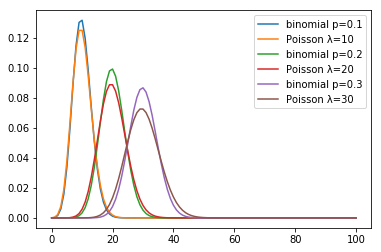

In [88]:
for p in range(1,4):
    plot_distribution(100,100,0.1*p)
plt.show()

In [95]:
# 分赌本
def bookie(n,win1,win2):
    for i in range(2*n-win1-win2-1):
        d=random.randint(1,2)
        if d==1:
            win1+=1
        else:
            win2+=1
        if win1==n:
            return 1
        if win2==n:
            return 2

In [100]:
n=10000
win=0
for i in range(n):
    if bookie(10,5,2)==1:
        win+=1
print(win/n)

0.8065
0.7142857142857143
